In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
! wget http://xurl.es/munich.txt

--2015-10-14 10:11:13--  http://xurl.es/munich.txt
Resolving xurl.es... 82.165.172.202
Connecting to xurl.es|82.165.172.202|:80... connected.
HTTP request sent, awaiting response... 404 Not Found
2015-10-14 10:11:14 ERROR 404: Not Found.



In [7]:
weather = np.loadtxt("munich.txt")

In [8]:
time = weather[:,0]
temp = weather[:,1]

In [9]:
first = int(time[0])
last = int(time[-1]) - 1

In [10]:
years = [int(itm) for itm in np.nditer(time)]
index = [i for i, _ in enumerate(years) if (_ == first or _ == last)]

In [11]:
plot_labels = zip(weather[index, 0], weather[index, 1])

In [12]:
first_year_data = [(a, b) for a, b in plot_labels if int(a) == first]
secnd_year_data = [(a, b) for a, b in plot_labels if int(a) == last]

In [13]:
first_year_data = [b for a, b in first_year_data]

In [14]:
secnd_year_data = [b for a, b in secnd_year_data]

In [15]:
x_label = range(0, len(first_year_data))

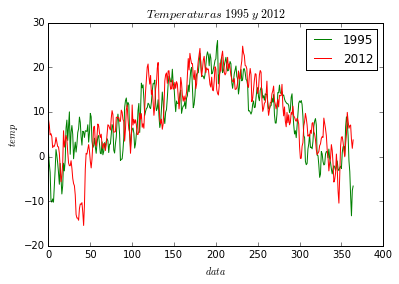

In [16]:
plt.plot(x_label, first_year_data, c = "green", label = str(first))
plt.plot(x_label, secnd_year_data, c = "red", label = str(last))
plt.xlabel("$data$")
plt.ylabel("$temp$")
plt.title("$Temperaturas \ 1995 \ y \ 2012$")
plt.legend(loc=0)

In [20]:
# Segundo punto
from datetime import datetime, timedelta
JANUARY = 1
JULY = 7

In [21]:
weather = np.loadtxt("munich.txt")

In [22]:
time = weather[:,0]
temp = weather[:,1]

In [45]:
def classify1(y):
    year = int(y)
    rem = y - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    return result.year, result.month

def classify2(year):
    lst = list(numpy.linspace(int(year), int(year) + 1, 12))
    i = 1
    flag = True
    while flag:
        if lst[i - 1] < year and lst[i] >= year:
            flag = False
        i += 1
    return year, i
    
classify = classify1

In [46]:
plot_labels = zip(weather[index, 0], weather[index, 1])
january_data = filter(lambda tpl : tpl[2][-1] == JANUARY, [(a, b, classify(a)) for a, b in plot_labels])
july_data = filter(lambda tpl : tpl[2][-1] == JULY, [(a, b, classify(a)) for a, b in plot_labels])

In [47]:
january_data = [b for a, b, c in january_data]
july_data = [b for a, b, c in july_data]

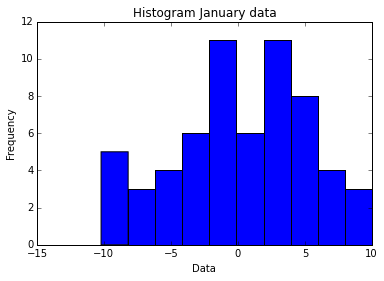

In [48]:
plt.figure()
plt.hist(january_data)
plt.title('Histogram January data')
plt.ylabel('Frequency')
plt.xlabel('Data')

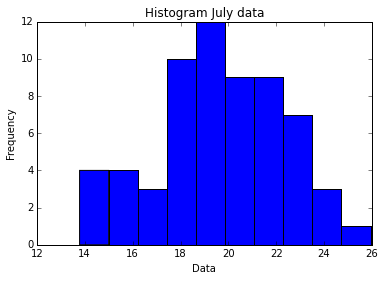

In [49]:
plt.figure()
plt.hist(july_data)
plt.title('Histogram July data')
plt.ylabel('Frequency')
plt.xlabel('Data')